# Tumor growth modeling
This practical session is intended to explore tumor growth data and interpret it using mathematical models. It is divided into three parts (only the first two parts will be covered in this session):
1. Analysis of the data by basic plots
2. Fitting and comparing tumor growth models to the data in order to understand **tumor growth laws**
3. Using the model(s) to **predict** future tumor growth with only a limited number of initial data points

The data provided consists of measurements of tumor volumes from tumors implanted subcutaneously in the back of mice. The cells are from a murine lung cancer cell line (Lewis Lung Carcinoma). The volumes were computed from two one dimensional measures recorded using a caliper (the length $L$ and width $w$) and using the formula $V = \frac{1}{2}L\times w^2$. Volumes are given in mm$^3$ as a function of days following injection of the cells ($10^6$ cells $\simeq$ 1 mm$^3$ injected on day 0.

Are you ready to start your exploration? 

Good luck on your adventure! :)

# 1. Data analysis

### Import modules

In [ ]:
% matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the data file ``data_table.xlsx`` as a pandas Dataframe and display it

In [10]:
df = pd.read_excel('data_table.xlsx')
df

1            2            3            4            5   \
5           NaN    54.886377          NaN          NaN    68.809022   
6           NaN    59.408036    89.231295    55.348590    59.853289   
7     50.021795    85.662278   157.351502    56.175814    58.988502   
11   309.519493   261.572775   221.698580   103.330909   179.664759   
12   324.895878   412.265650   327.492254   155.320341   309.787647   
13   450.842120   488.450738   461.437963   167.958671   470.571322   
14   572.450814   618.854795   641.444986   219.378690   480.930314   
15   664.336606   798.997212   746.868414   412.378378   488.777983   
18  1151.693754  1218.721058  1359.458389   584.192211  1021.721046   
19  1338.383299  1415.471856  1626.874371   762.074018  1278.530775   
20  1522.807849  1410.149208  2063.912472   880.325721  1377.381845   
21  1897.073737  1524.126579          NaN  1040.074430  1538.922047   
22          NaN  1935.415344          NaN  1335.136464  1958.560253   
24          NaN          NaN          NaN  1850.447333          NaN   
25          NaN          NaN          NaN  2079.445167          NaN   

             6           7            8            9            10  
5           NaN         NaN          NaN          NaN          NaN  
6     46.502387   94.727972          NaN    18.567329    26.880016  
7     55.155193  126.094176          NaN    73.293694          NaN  
11   251.222209  333.136619   201.165288   126.820889   144.151300  
12   341.175444  538.680724   316.382967   222.661158   193.401925  
13   438.335387  669.929621   338.240373   244.726914   281.171233  
14   859.952765  762.527617   411.958788   333.629836   294.886207  
15   854.727952  923.717646   586.667016   367.475268   391.884141  
18  1143.279505         NaN   991.881984   805.778850   744.954870  
19  1645.406820         NaN  1219.899900  1030.034281   990.331786  
20  1950.482691         NaN  1833.096551  1272.818884  1085.314905  
21          NaN         NaN  2131.605693  1555.359077  1331.189667  
22          NaN         NaN          NaN  1671.148523  1641.333918  
24          NaN         NaN          NaN          NaN  1992.067465  
25          NaN         NaN          NaN          NaN          NaN

Get the time vector. It is in days

In [4]:
time = df.index
time

Int64Index([5, 6, 7, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 24, 25], dtype='int64')

Plot the growth of the first three mice.

Text(0,0.5,'Volume (mm^3)')

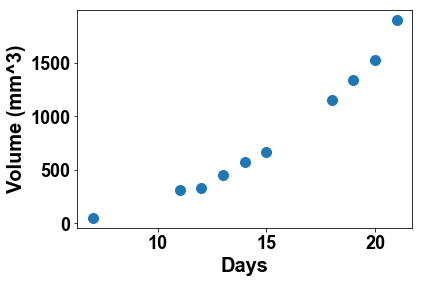

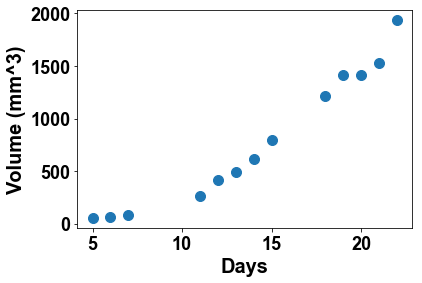

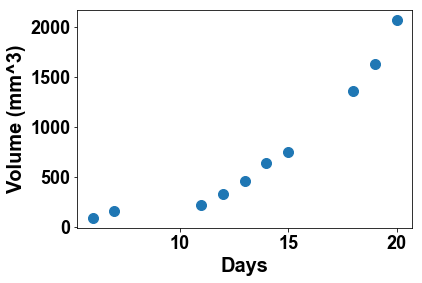

In [5]:
# Mouse 1
plt.figure(1)
plt.plot(time, df[1], 'o')
plt.xlabel('Days')
plt.ylabel('Volume (mm^3)')

# Mouse 2
plt.figure(2)
plt.plot(time, df[2], 'o')
plt.xlabel('Days')
plt.ylabel('Volume (mm^3)')

# Mouse 3
plt.figure(3)
plt.plot(time, df[3], 'o')
plt.xlabel('Days')
plt.ylabel('Volume (mm^3)')

Plot all tumor growth on the same panel

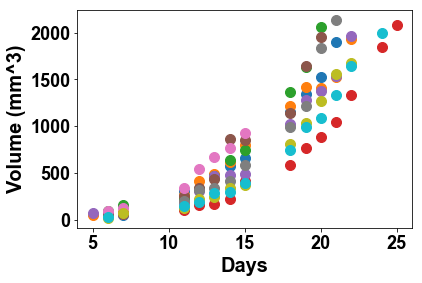

In [6]:
for mouse in df.columns:
    plt.plot(time, df[mouse], 'o')
    plt.xlabel('Days')
    plt.ylabel('Volume (mm^3)')

Plot the average of the data with error bars as standard deviations

Text(0,0.5,'Volume (mm^3)')

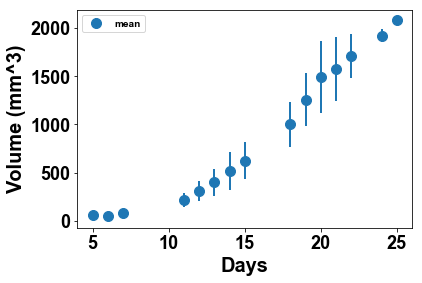

In [7]:
# Generate columns with mean
df['mean'] = df.mean(axis=1)
# Generate columns with std
df['std'] = df.std(axis=1)
df[['mean']].plot(fmt='o', yerr=df['std'])
plt.legend(loc='upper left')
plt.xlabel('Days')
plt.ylabel('Volume (mm^3)')

From the individual plots, what tumor growth pattern/equation would you suggest? How could you simply graphically test it? What do you conclude?

Text(0,0.5,'Volume (mm^3)')

/Users/benzekry/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


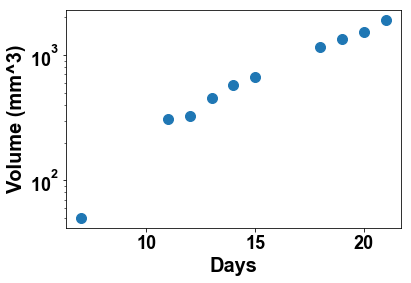

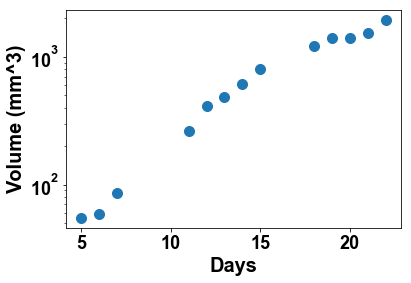

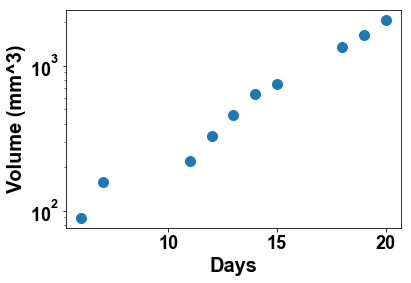

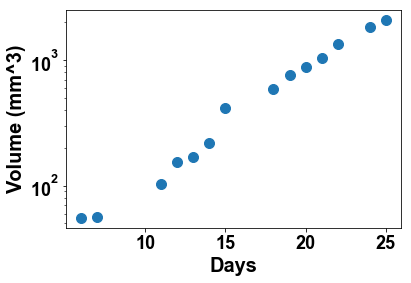

In [9]:
# Exponential growth
# Should be linear in log scale
# Mouse 1
plt.figure(1)
plt.semilogy(time, df[1], 'o')
plt.xlabel('Days')
plt.ylabel('Volume (mm^3)')

# Mouse 2
plt.figure(2)
plt.semilogy(time, df[2], 'o')
plt.xlabel('Days')
plt.ylabel('Volume (mm^3)')

# Mouse 3
plt.figure(3)
plt.semilogy(time, df[3], 'o')
plt.xlabel('Days')
plt.ylabel('Volume (mm^3)')

# Mouse 4
plt.figure(4)
plt.semilogy(time, df[4], 'o')
plt.xlabel('Days')
plt.ylabel('Volume (mm^3)')